In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import h5py
#Open the file as read only mode
h5f=h5py.File('/content/drive/My Drive/Colab Notebooks/Computer_Vision/project_res7/Project/project_NN/SVHN_single_grey1.h5','r')

#Load Train and test

xtrain = h5f['X_train'][:]
ytrain = h5f['y_train'][:]
xtest = h5f['X_test'][:]
ytest = h5f['y_test'][:]

#Close the file
h5f.close()

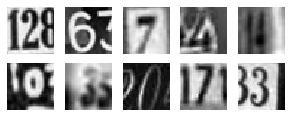

In [0]:
#Visualize the data 
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
plt.show()


In [0]:
#Check the unique label values
print(np.unique(ytrain))

[0 1 2 3 4 5 6 7 8 9]


In [0]:
#Have a look at the shape of the data
xtrain.shape, ytrain.shape, xtest.shape , ytest.shape

((42000, 32, 32), (42000,), (18000, 32, 32), (18000,))

In [0]:
#Reshape xtrain and xtest for the K-Nearest Neighbour Model
xtrain = np.reshape(xtrain ,(42000,1024))
xtest  = np.reshape(xtest ,(18000,1024))

In [0]:
#As the input is large, its taking longer time to run a KNN model. So, creating smaller subsets of data.
xtrain_knn =xtrain[:1000]
ytrain_knn =ytrain[:1000]

In [0]:
xtrain_knn.shape,ytrain_knn.shape

((1000, 1024), (1000,))

In [0]:
xtest_knn =xtest[:3000]
ytest_knn =ytest[:3000]

In [0]:
#Build KNN Model to find the best value with misclassification error
a =[]
j = []
def knnvalue(k):
    from sklearn.neighbors import KNeighborsClassifier
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'uniform', metric='euclidean')
    NNH.fit(xtrain_knn, ytrain_knn)
    predicted_labels = NNH.predict(xtest_knn)
    from sklearn.metrics import accuracy_score
    ascore = accuracy_score(ytest_knn, predicted_labels)
    MSE = 1-ascore
    a.append(MSE)
    j.append(k)
    print(MSE) 

In [0]:
#RUn KNN for kvalue in a loop
for i in range(1,19,2):
  knnvalue(i)

0.751
0.754
0.7486666666666666
0.75
0.7533333333333333
0.7556666666666667
0.767
0.761
0.7563333333333333


In [0]:
#Now lets us run KNN till k value of 40
for i in range(1,40,2):
  knnvalue(i)

0.751
0.754
0.7486666666666666
0.75
0.7533333333333333
0.7556666666666667
0.767
0.761
0.7563333333333333
0.76
0.7616666666666667
0.7673333333333333
0.7683333333333333
0.7626666666666666
0.7666666666666666
0.77
0.7716666666666667
0.7723333333333333
0.775
0.779


In [0]:
#From the above run, the max value is attained at k value of 39. Now lets train the model for k value of 
#30 and print the metrics
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 39 , weights = 'uniform', metric='euclidean')
NNH.fit(xtrain_knn, ytrain_knn)
pred=NNH.predict(xtest_knn)

In [0]:
#Print Classification Report 
from sklearn.metrics import classification_report
print("Classification report")
print(classification_report(ytest_knn, pred))



Classification report
              precision    recall  f1-score   support

           0       0.24      0.35      0.28       322
           1       0.27      0.29      0.28       289
           2       0.18      0.33      0.23       295
           3       0.22      0.12      0.16       272
           4       0.22      0.39      0.28       301
           5       0.27      0.15      0.19       319
           6       0.18      0.24      0.21       303
           7       0.37      0.21      0.27       294
           8       0.20      0.01      0.01       302
           9       0.17      0.11      0.13       303

   micro avg       0.22      0.22      0.22      3000
   macro avg       0.23      0.22      0.20      3000
weighted avg       0.23      0.22      0.20      3000



In [0]:
#Print Confusion Matrix
from sklearn.metrics import confusion_matrix
print ("Confusion matrix")
print(confusion_matrix(ytest_knn,pred))

Confusion matrix
[[113  24  43   8  44  10  50   7   4  19]
 [ 23  84  46  15  59   7  26  15   0  14]
 [ 37  24  98   6  50   9  25  25   1  20]
 [ 31  30  56  34  35  31  29  11   1  14]
 [ 33  22  41  14 118   5  41   9   1  17]
 [ 43  30  59  21  56  47  35   9   0  19]
 [ 45  29  51  17  46  16  73  10   1  15]
 [ 33  28  65  20  36   8  32  61   0  11]
 [ 64  19  42  14  55  20  51   6   2  29]
 [ 58  21  56   7  49  23  44  12   0  33]]


In [0]:
#Now Building a Deep Nueral Network Model
import tensorflow as tf

In [0]:
#COnvert ytrain and ytest to categorical
ytrain = tf.keras.utils.to_categorical(ytrain, num_classes=10)
ytest = tf.keras.utils.to_categorical(ytest, num_classes=10)

In [0]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((42000, 32, 32), (42000, 10), (18000, 32, 32), (18000, 10))

In [0]:
#tf.keras.backend.clear_session()

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
#Reshape data from 2Dimensional to 1Dimensional -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Dense layer two
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Dense layer two
model.add(tf.keras.layers.Dense(200, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

from keras import optimizers
sgd = optimizers.SGD(lr=0.001)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [0]:
model.fit(xtrain, ytrain, 
          validation_data=(xtest, ytest), 
          epochs=10
          )

Train on 42000 samples, validate on 18000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
42000/42000 [==============================] - 7s 164us/sample - loss: 1.7377 - acc: 0.4245 - val_loss: 1.1969 - val_acc: 0.6368
Epoch 2/10
42000/42000 [==============================] - 6s 148us/sample - loss: 1.1377 - acc: 0.6470 - val_loss: 0.9718 - val_acc: 0.7073
Epoch 3/10
42000/42000 [==============================] - 6s 144us/sample - loss: 0.9723 - acc: 0.6991 - val_loss: 0.8703 - val_acc: 0.7405
Epoch 4/10
42000/42000 [==============================] - 6s 147us/sample - loss: 0.8777 - acc: 0.7318 - val_loss: 0.7735 - val_acc: 0.7734
Epoch 5/10
42000/42000 [==============================] - 6s 149us/sample - loss: 0.8142 - acc: 0.7493 - val_loss: 0.7472 - val_acc: 0.7818
Epoch 6/10
42000/42000 [==============================] - 6s 149us/sample - loss: 0.7623 - acc: 0.7650 - val_loss: 0.6996 - val_acc: 0.7977
Epoch 7/10
42000/42000 [==============================] - 6s 1